**soluzione dell'equazione di schrödinger**


anche l'equazione di schrödinger è una ode: consideriamo l'equazione per il moto unidimensionale,

$\frac{\hbar^2}{2m}\frac{d^2}{dx^2}\psi= (V-E)\psi$

possiamo facilmente riscriverla nella forma di una ode a due componenti:

$y \equiv [\psi, \psi'] \equiv [r,s]$

l'equazione di schrödinger, sarà allora:
$y'=[\psi', \psi'']= [s, 2m/\hbar^2(V-E) r]$

per comodità lavoreremo in unità atomiche, dove $\hbar=1$.


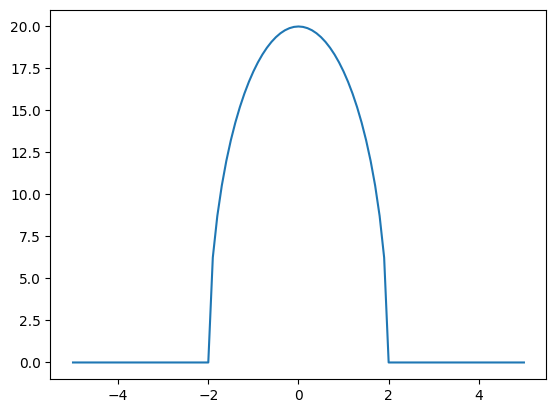

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as ntg

def potential(x, a, d):
    if x<-a:
        return 0.0
    elif x>a:
        return 0.0
    else:
        return d*np.sqrt(a**2-x**2)

vpotential=np.vectorize(potential)

x=np.linspace(-5.0, 5.0, 101)
y=vpotential(x,2.0, 10.0)
plt.plot(x,y)


la funzione np.vectorize ci permette di prendere una qualunque funzione puntuale definita da noi e
trasformarla in una funzione che opera su array

abbiamo definito un potenziale a forma di muro, adesso

a. scrivete una funzione che soddisfi l'equazione di schrödinger come l'abbiamo scritta sopra, dovrà
accettare come parametri la massa m, una funzione potenziale v, e restituire $y'$

In [4]:
def schr(x, y, m, v, E):
    psi,psid=y
    psidd=(v(x)-E)*psi/2/m
    return [psid, psidd]

b. impostate le condizioni iniziali per il problema, una particella uscente da destra, pertanto
rispondente alla forma $\psi=e^{-ikx}$

In [5]:
def iniziale(k):
    return [complex(1), complex(0, -k)]   # 

In [6]:
#prova schr
schr(-5, iniziale(1), 1, lambda xx:potential(xx,2,10), 5.0)

[-1j, (-2.5+0j)]

c. risolvete l'equazione differenziale nell'intervallo definito dalla x nel riquadro precedente e nel
grafico

In [7]:
from scipy.integrate import ode
import math
co=ode(schr).set_integrator('zvode', method='bdf')   # integratore adatto anche per numeri complessi
massa=1.0
energia=15.0
k=math.sqrt(energia*2*massa)
psiv_in=iniziale(k)
co.set_initial_value(psiv_in, -5).set_f_params(massa, lambda xx: potential(xx, 2.0, 10.0), energia)
psiv=[psiv_in]+[co.integrate(xi) for xi in x[1:]]

/home/fc/.local/python3.11/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


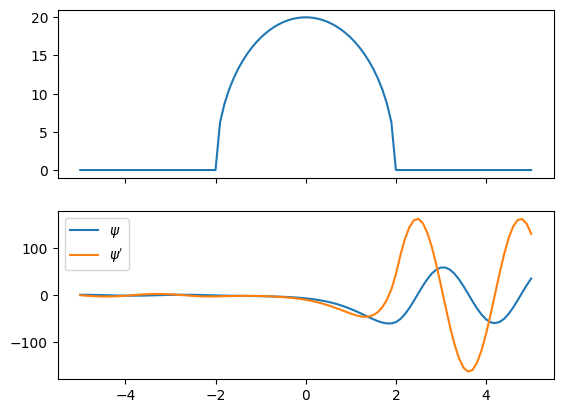

In [8]:
fig,(ax1,ax2)=plt.subplots(nrows=2, sharex=True)
ax1.plot(x,y)
psi_v=[p[0] for p in psiv]
psi_d=[p[1] for p in psiv]
ax2.plot(x,psi_v, label='$\psi$')
ax2.plot(x,psi_d, label="$\psi'$")
ax2.legend()

d. ottenete i coefficienti di trasmissione e di riflessione, ovvero le componenti di $e^{ikx}$ e
$e^{-ikx}$ nella soluzione finale,

eseguite ciascuno di questi passaggi in una cella diversa aiutandovi nell'analisi con dei grafici.

\begin{align} 
\psi &=&a e^{ikx}+b e^{-ikx}\\
\psi' &=&ik(a e^{ikx}-b e^{-ikx})
\end{align}

\begin{align}
ik \psi + \psi' &=& 2ika\\
ik \psi - \psi' &=& 2ikb
\end{align}

In [9]:
psi_in=psiv[-1][0]
psi_in_d=psiv[-1][1]
a=(psi_in_d+complex(0,k)*psi_in)/complex(0,2*k)
b=(-psi_in_d+complex(0,k)*psi_in)/complex(0,2*k)
a,b

((-0.00016970129196069934-38.49728035442339j),
 (35.67716445002244-14.497601655103741j))

In [10]:
trasmissione=1/np.vdot(a,b).real
riflessione=1-trasmissione
trasmissione

0.0017917544790857648

In [12]:
def calcola_trasmissione(E):
    co=ode(schr).set_integrator('zvode', method='bdf')   # integratore adatto anche per numeri complessi
    massa=1.0
    energia=E
    k=math.sqrt(energia*2*massa)
    psiv_in=iniziale(k)
    co.set_initial_value(psiv_in, -5).set_f_params(massa, lambda xx: potential(xx, 2.0, 10.0), energia)
    psiv=[psiv_in]+[co.integrate(xi) for xi in x[1:]]
    psi_in=psiv[-1][0]
    psi_in_d=psiv[-1][1]
    a=(psi_in_d+complex(0,k)*psi_in)/complex(0,2*k)
    b=(-psi_in_d+complex(0,k)*psi_in)/complex(0,2*k)
    trasmissione=abs(1/np.vdot(a,b).real)
    return trasmissione

In [13]:
Ev=np.arange(10,19,0.05)
trv=[calcola_trasmissione(Ei) for Ei in Ev]

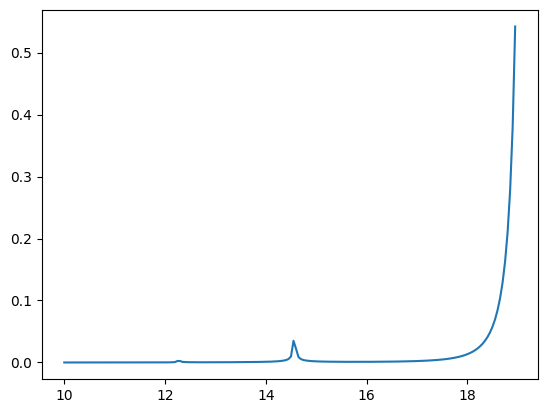

In [14]:
plt.plot(Ev, trv)

In [20]:
trv



[1.161088700855337e-06,
 1.2339087476661656e-06,
 1.3138190711763479e-06,
 1.4017269678393598e-06,
 1.4984780368587829e-06,
 1.60504406123166e-06,
 1.7226622524891479e-06,
 1.852751916004122e-06,
 1.9966337387820357e-06,
 2.156319047301669e-06,
 2.3336037130666346e-06,
 2.5310604755779235e-06,
 2.7511897669846677e-06,
 2.9972385773716416e-06,
 3.2729423163697386e-06,
 3.582230827424936e-06,
 3.929240114945694e-06,
 4.3230084597853785e-06,
 4.767268702364086e-06,
 5.271052358012029e-06,
 5.844260932686295e-06,
 6.498312036197153e-06,
 7.247565222912085e-06,
 8.10839478366646e-06,
 9.10158317442852e-06,
 1.0251995975288952e-05,
 1.1590740760500297e-05,
 1.3155838520696424e-05,
 1.49964905780834e-05,
 1.7172943153252814e-05,
 1.976397017245662e-05,
 2.287108298159533e-05,
 2.6627096165068087e-05,
 3.121058779001513e-05,
 3.686841188545781e-05,
 4.3941064558548304e-05,
 5.29159921233052e-05,
 6.452579426000402e-05,
 7.989465202212578e-05,
 0.0001008543702390853,
 0.0001305833088480334,
 0.